# Predicting the Disease outbreak with Machine Learning Algorithms!

---

In [53]:
import pandas as pd
import numpy as np

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [55]:
## Reading the dataset from Kaggle
df=pd.read_json('D:/spread of disease dataset.json')

In [56]:
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


## *Checking for Null values*


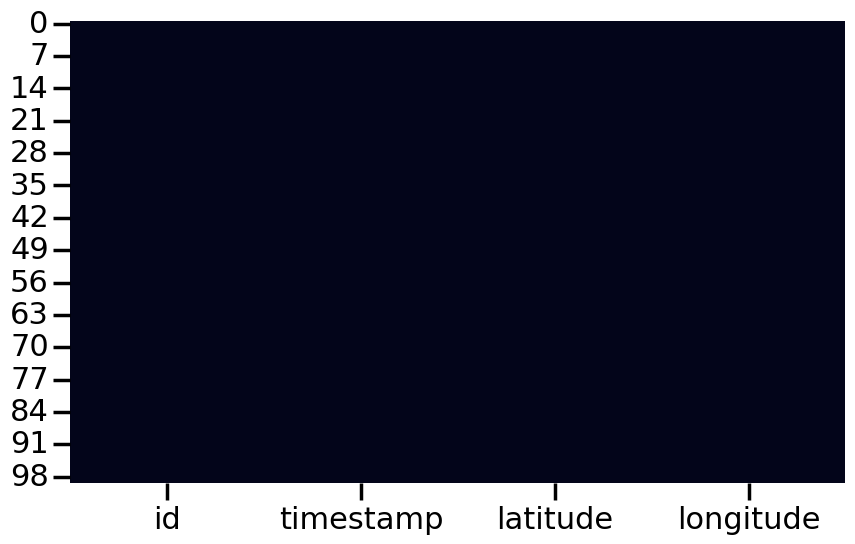

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('poster')

#### So, No null values to take care of !

---

## _Exploratory Data Analysis_

In [58]:
df.shape

(100, 4)

In [59]:
df.describe()

,timestamp,latitude,longitude
count,100,100.000000,100.000000
mean,2020-07-04 17:41:29.999999232,13.134709,77.639229
min,2020-07-04 12:35:30,13.010284,77.553381
25%,2020-07-04 14:35:30,13.081266,77.596577
50%,2020-07-04 17:05:30,13.133868,77.646240
75%,2020-07-04 20:35:30,13.195195,77.681645
max,2020-07-04 23:35:30,13.249645,77.705454
std,NaN,0.069591,0.046132


### _Finding Correlations_

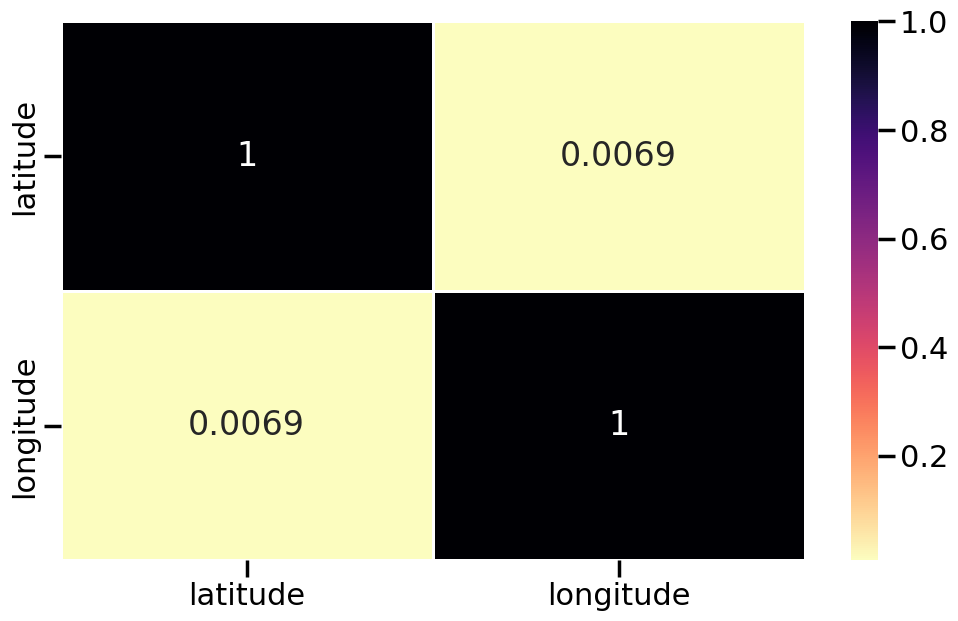

In [60]:
corr = df.select_dtypes(include=['number']).corr(method='kendall')
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, cmap="magma_r", linewidths=.9)
plt.show()


### _Visualizations_

C:\Users\hp\AppData\Local\Temp\ipykernel_15848\2420272578.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['latitude'], color = 'maroon')


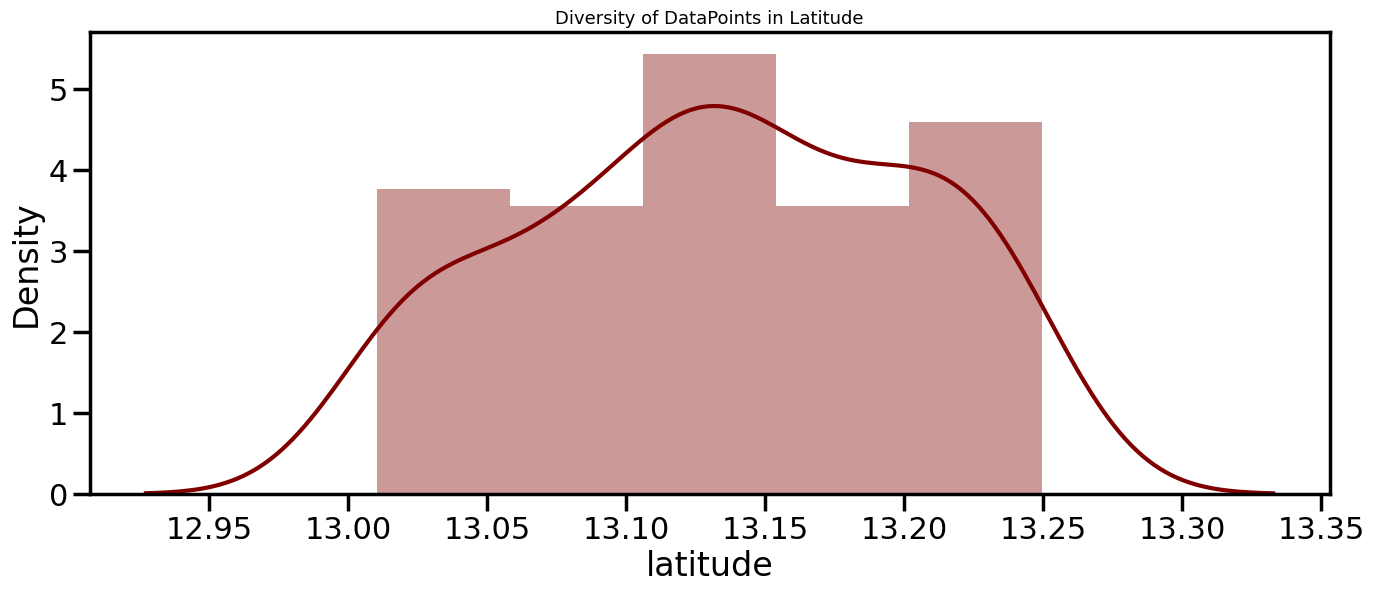

In [61]:
plt.figure(figsize=(16,6))
sns.distplot(df['latitude'], color = 'maroon')
plt.title('Diversity of DataPoints in Latitude', size = 13)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_15848\3037759671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['longitude'], color = 'maroon')


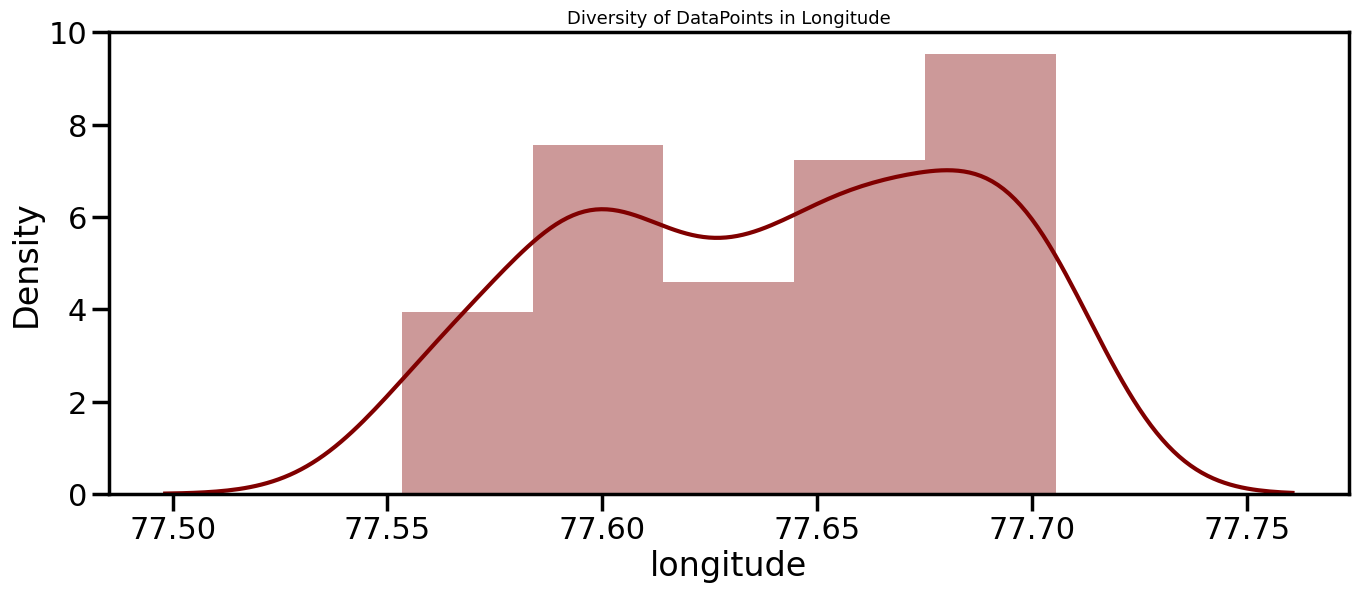

In [62]:
plt.figure(figsize=(16,6))
sns.distplot(df['longitude'], color = 'maroon')
plt.title('Diversity of DataPoints in Longitude', size = 13)
plt.show()

### _Place of tracing for the following people_

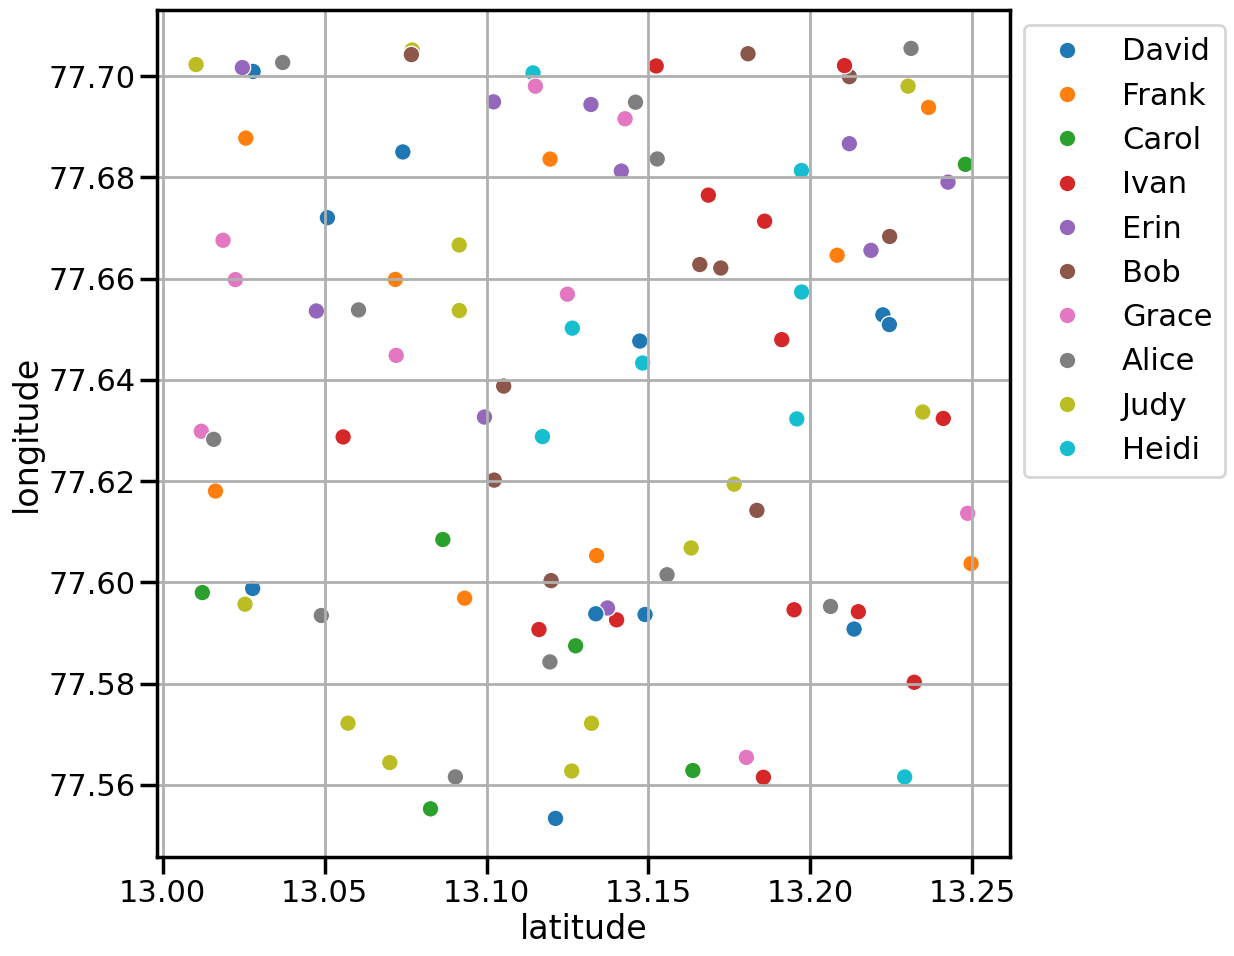

In [63]:
plt.figure(figsize=(11,11))
sns.scatterplot(x="latitude",y="longitude",data=df,hue="id")
sns.set_context('poster')
plt.legend(bbox_to_anchor=(1.27,1),loc='upper right')
plt.grid()

### _A simple countplot for visualizing the frequency_

C:\Users\hp\AppData\Local\Temp\ipykernel_15848\1766730782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x='id',data=df, palette='rocket')
C:\Users\hp\AppData\Local\Temp\ipykernel_15848\1766730782.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")


Text(0.5, 1.0, 'Frequency of name of people in this Dataset :')

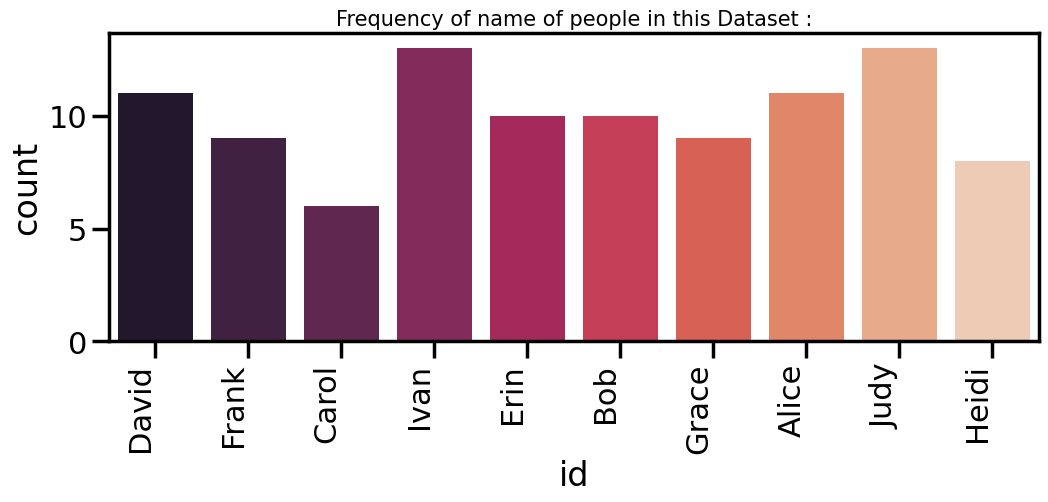

In [64]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='id',data=df, palette='rocket')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Frequency of name of people in this Dataset :", size =15)

---
# Creating the Model
## _Using DBSCAN Clustering_

_DBSCAN is an Unsupervised Machine Learning Technique._ <BR>
_By which, we will be able to Cluster the Data Points Precisely._ <br>
_It also helps to detect the noise in Dataset_


In [65]:
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


In [66]:
from sklearn.cluster import DBSCAN

In [67]:
safe_distance = 0.018288
model2 = DBSCAN(eps=safe_distance, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
core_samples_mask = np.zeros_like(model2.labels_, dtype=bool)
core_samples_mask[model2.core_sample_indices_] = True
labels = model2.labels_
df['Clusters'] = model2.labels_.tolist()

In [68]:
model2

DBSCAN(eps=0.018288, metric='haversine', min_samples=2)

## _Clusters made by DBSCAN algorithm_

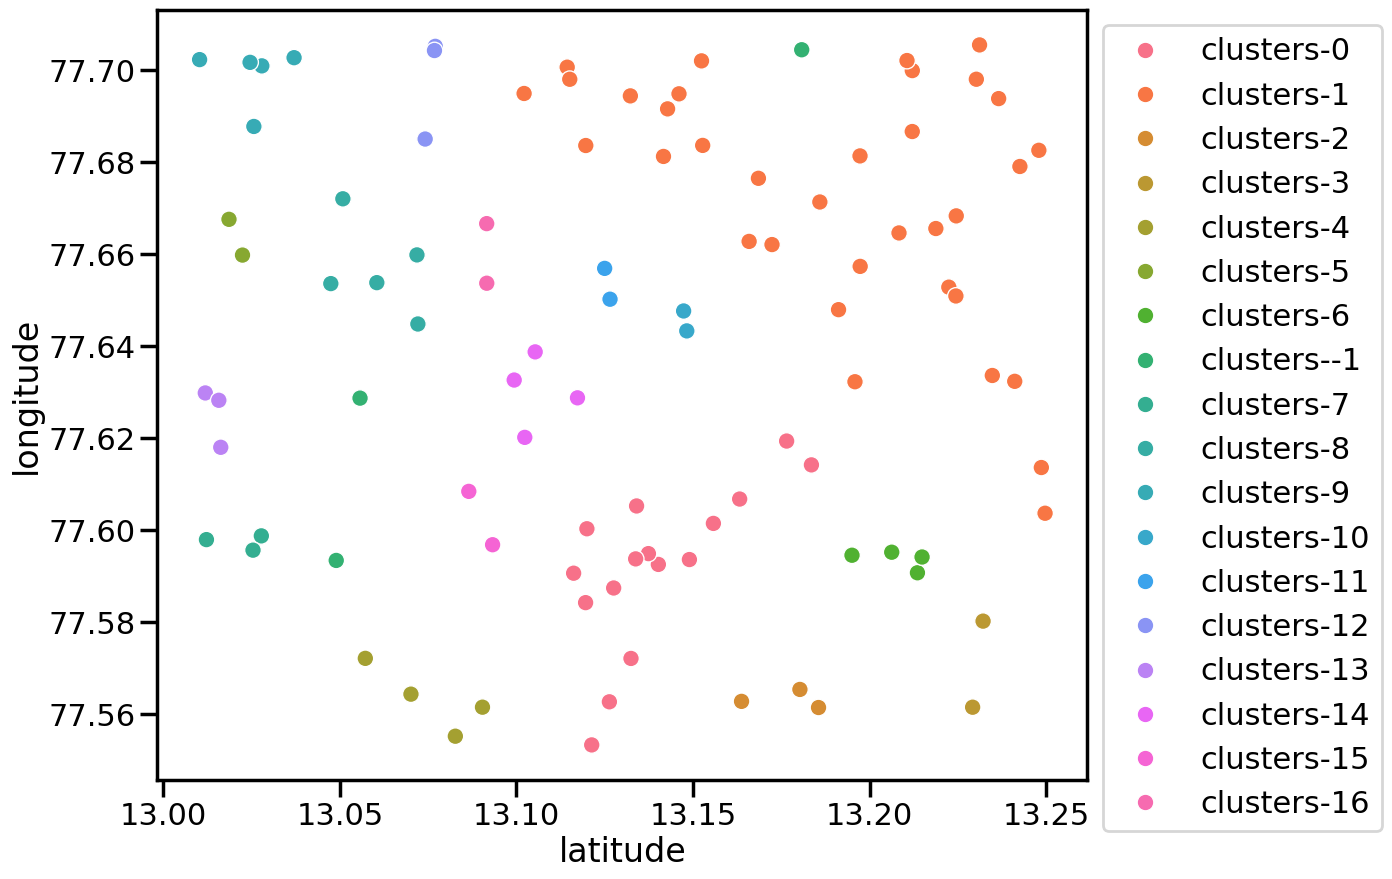

In [69]:
fig = plt.figure(figsize=(12, 10))
sns.scatterplot(x=df['latitude'], y=df['longitude'], hue=['clusters-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor=[1, 1])
sns.set_context('poster')
plt.show()


## _Predicting Disease Transfer for a Person :_

In [70]:
Name = "Ivan"
inputCluster = set()
for i in range(len(df)):
    if df['id'][i] == Name:
        inputCluster.add(df['Clusters'][i])

In [71]:
infected = set()
for cluster in inputCluster:
    if cluster != -1:
        namesInCluster = df.loc[df['Clusters'] == cluster, 'id']
        for i in range(len(namesInCluster)):
            name = namesInCluster.iloc[i]
            if name != Name:
                infected.add(name)

In [72]:
name

'Alice'

## Here, we cn say that Alice was infected by Ivan !
---